## Description
The problem attempted to solve will be to locate the best area to open an Asian restaurant in the city of London. we will approach this problem by applying machine learning techniques and data mining and analysis to model a proper solution to the problem.

## Data

The data we will use are as follows:

    -  Foursquare Api
    -  London City Hall website    

## Methodology 

Our Methodology to approach this problem will be by understanding the social demography of the different neighborhoods and Boroughs to understand the ethnic distribution among the city and we will also the most popular venues in each area and try to get an understanding of the social taste for food and the statues of competing Asian restaurants. 
We will then apply k-means analysis to cluster the city and venues and reach conclusion on best cluster to open the business.

## Detailed Approach

Our detailed approach will be by mining for data of the distribution of ethnic groups in London Boroughs and understand the demography of each borough and the ethnic concentration in each. We will then obtain the top venues in each borough using foursqaure API and will have a look at the top 10 venues in each borough. With these data we will apply k-means algorithm to cluster the boroughs and venues in clusters and analyze each to determine best cluster to achieve our objective.


## Target Audience 

Our Target audience are the investors willing to invest in restaurant business.

## Setting up the notebook

In [1]:
# setting up the notebook
import numpy as np
import pandas as pd
!conda install -c anaconda xlrd --yes

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2s             |       h7b6447c_0         3.1 MB  anaconda
    certifi-2019.6.16          |           py36_0         154 KB  anaconda
    xlrd-1.2.0                 |           py36_0         188 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

    openssl: 1.0.2r-h14c3975_0 conda-forge --> 1.0.2s-h7b6447c_0 anaconda
    xlrd:    1.1.0-py37_1                  --> 1.2.0-py3

#### Data frame of Boroughs in London and ethnicity

In [2]:
ffs = pd.read_excel(r'londonethnicfs2.xlsx')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
ffs.head()

,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other
0,Barking and Dagenham,91949,1730,14707,7878,29594,37140,2913
1,Barnet,162117,8685,57751,17169,65918,27431,17315
2,Bexley,179250,2596,8116,5395,15243,19624,1773
3,Brent,55887,12320,44673,15775,105986,58632,17942
4,Bromley,239478,4463,16929,10897,16067,18686,2872


In [4]:
ffs.shape

(33, 8)

#### Set Data frame with London Boroughs Coordinates

In [5]:
dfbc = pd.read_excel(r'Londonboroughscoordinates.xlsx')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
dfbc.head(2)

,Borough,ltd,lng
0,Barking and Dagenham,51.5607,-0.1557
1,Barnet,51.6252,-0.1517


In [7]:
dfbc.shape

(33, 3)

#### Getting London coordinates and creating Boroughs map

In [8]:
# Getting london Coordinates
address = 'London'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [9]:
CLIENT_ID = '1BCV3ETBTLTUJS4AZIH2PSMKFACCR5N3HBJIVSCEYS1EJ1A5' # your Foursquare ID
CLIENT_SECRET = 'TGDLB02SP5KIRC21HKZ5SD0IGHGIMJSE4L3PQUBN4G3B2YE3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1BCV3ETBTLTUJS4AZIH2PSMKFACCR5N3HBJIVSCEYS1EJ1A5
CLIENT_SECRET:TGDLB02SP5KIRC21HKZ5SD0IGHGIMJSE4L3PQUBN4G3B2YE3


In [10]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Borough in zip(dfbc['ltd'], dfbc['lng'], dfbc['Borough']):
    label = '{}'.format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(london_map)  
    
london_map

#### Explore the Neighborhoods with Foursquare data

In [11]:
dfbc.head(3)

,Borough,ltd,lng
0,Barking and Dagenham,51.5607,-0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,-0.1505


In [12]:
dfbc.loc[0, 'Borough']

'Barking and Dagenham'

In [13]:
bltd = dfbc.loc[0, 'ltd'] #  latitude value
blng = dfbc.loc[0, 'lng'] #  longitude value

Borough_name = dfbc.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Borough_name, 
                                                               bltd, 
                                                               blng))

Latitude and longitude values of Barking and Dagenham are 51.5607, -0.1557.


In [14]:
LIMIT= 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    bltd, 
    blng, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1BCV3ETBTLTUJS4AZIH2PSMKFACCR5N3HBJIVSCEYS1EJ1A5&client_secret=TGDLB02SP5KIRC21HKZ5SD0IGHGIMJSE4L3PQUBN4G3B2YE3&v=20180605&ll=51.5607,-0.1557&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d47fce8db1d81002ca405c9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Highgate',
  'headerFullLocation': 'Highgate, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 51.5652000045, 'lng': -0.148475117349071},
   'sw': {'lat': 51.556199995499995, 'lng': -0.162924882650929}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518f5f964a5201faf20e3',
       'name': 'Parliament Hill',
       'location': {'address': 'Parliament Hill',
        'lat': 51.559661447069935,
        'lng': -0.15963905703647055,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.559661447

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Parliament Hill,Scenic Lookout,51.559661,-0.159639
1,Parliament Hill Farmers’ Market,Farmers Market,51.559420,-0.151418
2,GAIL's Bakery,Bakery,51.561942,-0.149528
3,Parliament Hill Fields Playground,Playground,51.556653,-0.157296
4,Bistro Laz,Mediterranean Restaurant,51.561333,-0.150528


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


#### Repeat the function for all boroughs

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [20]:
london_venues = getNearbyVenues(names= dfbc['Borough'],
                                   latitudes= dfbc['ltd'],
                                   longitudes= dfbc['lng']
                                  )


Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [21]:
london_venues.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,-0.1557,Parliament Hill,51.559661,-0.159639,Scenic Lookout
1,Barking and Dagenham,51.5607,-0.1557,Parliament Hill Farmers’ Market,51.559420,-0.151418,Farmers Market
2,Barking and Dagenham,51.5607,-0.1557,GAIL's Bakery,51.561942,-0.149528,Bakery
3,Barking and Dagenham,51.5607,-0.1557,Parliament Hill Fields Playground,51.556653,-0.157296,Playground
4,Barking and Dagenham,51.5607,-0.1557,Bistro Laz,51.561333,-0.150528,Mediterranean Restaurant


In [22]:
london_venues.shape

(1510, 7)

In [23]:
# get number of venues per Borough

london_venues.groupby('Borough').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,15,15,15,15,15,15
Barnet,4,4,4,4,4,4
Bexley,18,18,18,18,18,18
Brent,75,75,75,75,75,75
Bromley,5,5,5,5,5,5
Camden,99,99,99,99,99,99
City of London,100,100,100,100,100,100
Croydon,39,39,39,39,39,39
Ealing,74,74,74,74,74,74


#### Analyze Data

In [24]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
#madrid_onehot = madrid_onehot[['Neighborhood',
london_onehot.head()

,Borough,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Food,Food Court,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Lighting Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track Stadium,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [25]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Food,Food Court,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Lighting Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track Stadium,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0000,0.000000,0.000000,0.000000,0.066667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [26]:
london_grouped.shape

(33, 220)

#### Top 5 venues per Borough

In [27]:
num_top_venues = 5

for hood in london_grouped['Borough']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Barking and Dagenham----
                      venue  freq
0                      Café  0.13
1  Mediterranean Restaurant  0.13
2             Grocery Store  0.07
3                Playground  0.07
4              Tennis Court  0.07


----Barnet----
                 venue  freq
0                 Café  0.50
1               Lawyer  0.25
2             Bus Stop  0.25
3           Public Art  0.00
4  Peruvian Restaurant  0.00


----Bexley----
               venue  freq
0      Grocery Store  0.17
1                Pub  0.06
2  Fish & Chips Shop  0.06
3      Historic Site  0.06
4              Hotel  0.06


----Brent----
                 venue  freq
0                Hotel  0.09
1       Clothing Store  0.08
2          Coffee Shop  0.08
3  Sporting Goods Shop  0.07
4                  Bar  0.07


----Bromley----
                venue  freq
0                Café   0.4
1                 Pub   0.2
2                Park   0.2
3           Gastropub   0.2
4  African Restaurant   0.0


----Camden----
    

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Top 10 venues per Borough

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Borough_venues_sorted = pd.DataFrame(columns=columns)
Borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    Borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

Borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Mediterranean Restaurant,Café,Farmers Market,Food,Scenic Lookout,Grocery Store,Track Stadium,Trail,Bakery,Lake
1,Barnet,Café,Lawyer,Bus Stop,Yoga Studio,Fish & Chips Shop,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint
2,Bexley,Grocery Store,Italian Restaurant,Fish & Chips Shop,Coffee Shop,Breakfast Spot,Supermarket,Fish Market,Bar,Historic Site,Caucasian Restaurant
3,Brent,Hotel,Clothing Store,Coffee Shop,Sporting Goods Shop,Bar,American Restaurant,Sandwich Place,Music Venue,Burger Joint,Grocery Store
4,Bromley,Café,Pub,Gastropub,Park,Gaming Cafe,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Forest
5,Camden,Hotel,Coffee Shop,Pub,Café,Plaza,Italian Restaurant,Burger Joint,Garden,Bookstore,Deli / Bodega
6,City of London,Coffee Shop,Gym / Fitness Center,Seafood Restaurant,Italian Restaurant,Asian Restaurant,Pub,French Restaurant,Steakhouse,Restaurant,Hotel
7,Croydon,Coffee Shop,Pub,Gym / Fitness Center,Asian Restaurant,Portuguese Restaurant,Mediterranean Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place
8,Ealing,Coffee Shop,Clothing Store,Bakery,Bus Stop,Pub,Italian Restaurant,Park,Pizza Place,Hotel,Burger Joint
9,Enfield,Coffee Shop,Café,Clothing Store,Turkish Restaurant,Gift Shop,Bookstore,Supermarket,Department Store,Women's Store,Optical Shop


In [30]:
Borough_venues_sorted.shape

(33, 11)

## K Mean Analysis

In [87]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [98]:
london_grouped_clustering = london_grouped.drop('Borough', 1)

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(london_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [99]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

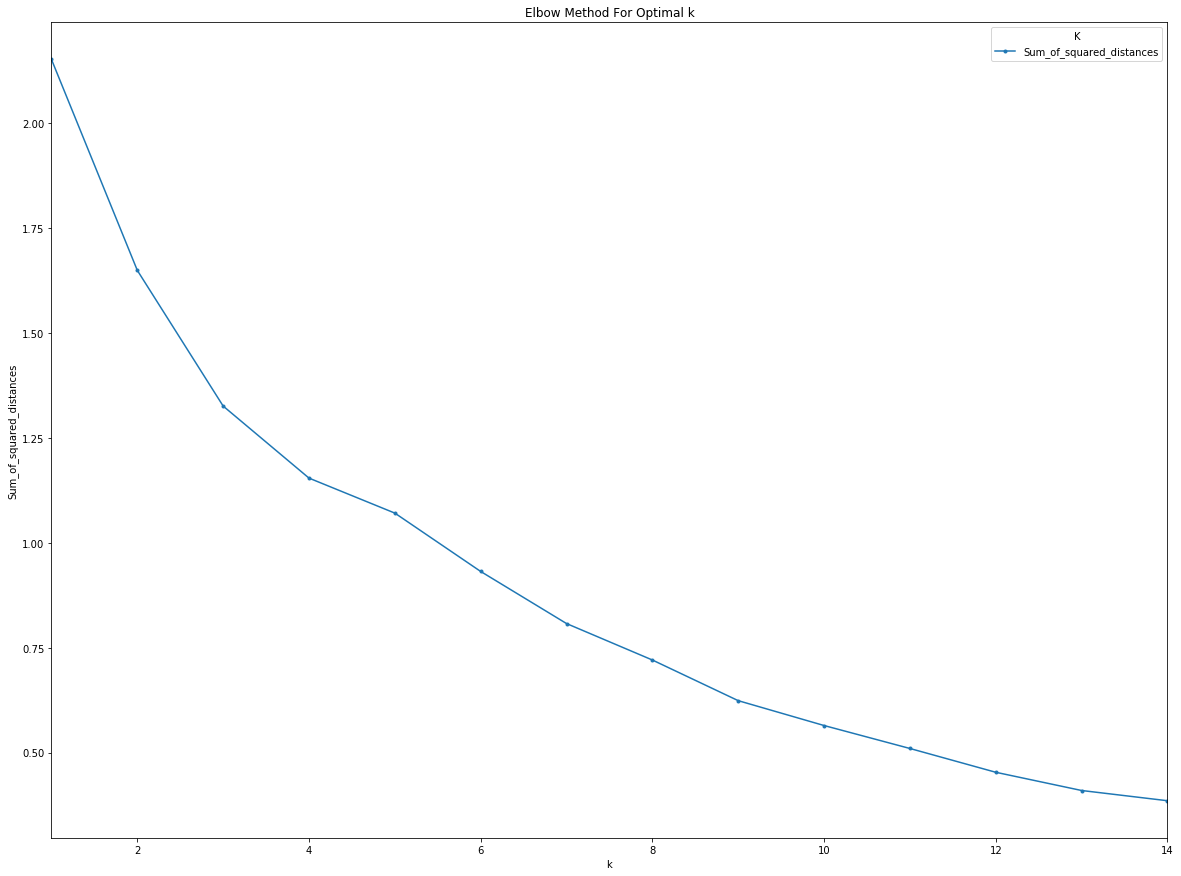

In [100]:
optimal_k.plot(kind = 'line', figsize = (20, 15), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### Its not very obvious but it seems our best K is 7

In [101]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 4, 1, 1, 1, 1, 1], dtype=int32)

In [102]:
ffs['Borough'] = Borough_venues_sorted['Borough']
print(ffs.shape)
ffs.isnull().sum()
ffs.dropna(how = 'any', axis = 0, inplace = True)
print(ffs.shape)
print(Borough_venues_sorted.shape)

(33, 9)
(33, 9)
(33, 11)


In [103]:
london_merged = ffs

# add clustering labels
london_merged['Cluster Labels'] = kmeans.labels_

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(Borough_venues_sorted.set_index('Borough'), on='Borough')
london_merged[['ltd', 'lng']] = dfbc[['ltd', 'lng']]
london_merged['ltd'] = london_merged['ltd'].astype(float)
london_merged['ltd'] = london_merged['ltd'].astype(float)
print(london_merged.shape)
london_merged.head() # check the last columns!

(33, 21)


,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ltd,lng
0,Barking and Dagenham,91949,1730,14707,7878,29594,37140,2913,0,Mediterranean Restaurant,Café,Farmers Market,Food,Scenic Lookout,Grocery Store,Track Stadium,Trail,Bakery,Lake,51.5607,-0.1557
1,Barnet,162117,8685,57751,17169,65918,27431,17315,2,Café,Lawyer,Bus Stop,Yoga Studio,Fish & Chips Shop,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,51.6252,-0.1517
2,Bexley,179250,2596,8116,5395,15243,19624,1773,1,Grocery Store,Italian Restaurant,Fish & Chips Shop,Coffee Shop,Breakfast Spot,Supermarket,Fish Market,Bar,Historic Site,Caucasian Restaurant,51.4549,-0.1505
3,Brent,55887,12320,44673,15775,105986,58632,17942,1,Hotel,Clothing Store,Coffee Shop,Sporting Goods Shop,Bar,American Restaurant,Sandwich Place,Music Venue,Burger Joint,Grocery Store,51.5588,-0.2817
4,Bromley,239478,4463,16929,10897,16067,18686,2872,4,Café,Pub,Gastropub,Park,Gaming Cafe,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Forest,51.4039,-0.0198


In [104]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['ltd'], london_merged['lng'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Clusters

### Cluster 1

In [105]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Borough'], ascending = False)

,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ltd,lng
23,Merton,96658,4417,28531,9334,36143,20811,3799,0,Park,Fast Food Restaurant,Supermarket,Café,Indian Restaurant,Bakery,Garden Center,Burger Joint,Grocery Store,Coffee Shop,51.4014,-0.1958
13,Haringey,88424,6997,58922,16548,24150,47830,12055,0,Fast Food Restaurant,Café,Indian Restaurant,Gym / Fitness Center,Portuguese Restaurant,Pub,Playground,Convenience Store,Park,Movie Theater,51.6000,-0.1119
0,Barking and Dagenham,91949,1730,14707,7878,29594,37140,2913,0,Mediterranean Restaurant,Café,Farmers Market,Food,Scenic Lookout,Grocery Store,Track Stadium,Trail,Bakery,Lake,51.5607,-0.1557


#### In this cluster we notice that the Asian population compared to other ethnicities is relatively low, also it shows an Indian restaurant that is popular

### Cluster 2

In [106]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Borough'], ascending = False)


,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ltd,lng
32,Westminster,77334,4960,53036,11395,31862,16472,24337,1,Sandwich Place,Hotel,Coffee Shop,Theater,Italian Restaurant,Gym / Fitness Center,Pub,Café,Hotel Bar,Sushi Restaurant,51.4973,-0.1372
31,Wandsworth,163739,7664,47813,15241,33338,32756,6444,1,Pub,Clothing Store,Coffee Shop,Asian Restaurant,Burger Joint,Breakfast Spot,Pizza Place,Supermarket,Gym / Fitness Center,Multiplex,51.4567,-0.1910
30,Waltham Forest,92999,3959,37841,13766,54389,44791,10504,1,Pub,Gym,Coffee Shop,Tea Room,Gym / Fitness Center,Art Gallery,Beer Store,Pizza Place,Vegetarian / Vegan Restaurant,Pool,51.5908,-0.0134
29,Tower Hamlets,79231,3863,31725,10360,104501,18629,5787,1,Italian Restaurant,Coffee Shop,Hotel,Sandwich Place,Fried Chicken Joint,Outdoor Sculpture,Chinese Restaurant,Grocery Store,Gym / Fitness Center,Convenience Store,51.5099,-0.0059
28,Sutton,134854,3219,11376,7134,22035,9120,2408,1,Pub,Clothing Store,Coffee Shop,Bar,Sandwich Place,Café,Pizza Place,Italian Restaurant,Video Game Store,Bookstore,51.3618,-0.1945
27,Southwark,114534,6222,35593,17778,27192,77511,9453,1,Coffee Shop,Pub,Restaurant,Bar,Scenic Lookout,English Restaurant,Café,Grocery Store,French Restaurant,Gym / Fitness Center,51.5035,-0.0804
26,Richmond upon Thames,133582,4766,22377,6780,13607,2816,3062,1,Coffee Shop,Pub,Italian Restaurant,Bus Stop,Indian Restaurant,Grocery Store,Sandwich Place,Pharmacy,Stationery Store,Café,51.4479,-0.3260
25,Redbridge,96253,3900,18493,11456,116503,24845,7520,1,Pub,Café,Cocktail Bar,Turkish Restaurant,Pizza Place,Italian Restaurant,Spanish Restaurant,Burrito Place,Grocery Store,Nightclub,51.5590,-0.0741
24,Newham,51516,2172,35528,13945,133895,60256,10672,1,Pub,Italian Restaurant,Hostel,Park,English Restaurant,Hotel,Indian Restaurant,Bus Stop,American Restaurant,Frozen Yogurt Shop,51.5077,-0.0469
22,Lewisham,114446,5206,28034,20472,25534,74942,7251,1,Supermarket,Grocery Store,Pub,Train Station,Coffee Shop,Platform,Italian Restaurant,Japanese Restaurant,Hardware Store,Shopping Mall,51.4452,-0.0209


#### In this cluster we notice also that the Asian population compared to other ethnicities is relatively low, also it shows there is a Chinese, Japanese and an Indian restaurant that are popular

### Cluster 3

In [107]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Borough'], ascending = False)

,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ltd,lng
1,Barnet,162117,8685,57751,17169,65918,27431,17315,2,Café,Lawyer,Bus Stop,Yoga Studio,Fish & Chips Shop,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,51.6252,-0.1517


#### In this cluster we see that the Asian population is high compared to other ethnicities and no Asian restaurants as competition

### Cluster 4

In [108]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Borough'], ascending = False)

,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ltd,lng
15,Havering,197615,2989,7345,4933,11545,11481,1324,3,Park,Breakfast Spot,Forest,Yoga Studio,Garden Center,Gaming Cafe,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,51.5812,-0.1837


#### Here the Asian population is very low compared to other ethnicities

### Cluster 5

In [109]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Borough'], ascending = False)

,Borough,White British,White Irish,White Other,Mixed,Asian,Black,Other,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ltd,lng
17,Hounslow,96264,4775,29466,10349,87257,16813,9033,4,Bed & Breakfast,Café,Pizza Place,Park,Film Studio,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Forest,51.4746,-0.3680
4,Bromley,239478,4463,16929,10897,16067,18686,2872,4,Café,Pub,Gastropub,Park,Gaming Cafe,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Forest,51.4039,-0.0198


#### Here the Asian population is very high compared to other ethnicities and no Asian restaurants in the popular venues

## Conclusions:

As we see from our data some clusters have high population of Asian people and also it shows if there is a popular Asian restaurant in one of the clusters 

By looking at the results we find that Cluster 5 is the best option for us as the Asian population density is considered high and no popular asian venues in the market which will limit the competition when penetration the market.